In [2]:
# First cell
!pip install qiskit # If needed
from qiskit import __version__
print(f"Qiskit {__version__} ready in Jupyter!")

Qiskit 2.1.2 ready in Jupyter!


In [3]:
import numpy as np
state = np.array([1, 0]) # Example quantum state |0>
prob = np.abs(state)**2
print(prob)

[1 0]


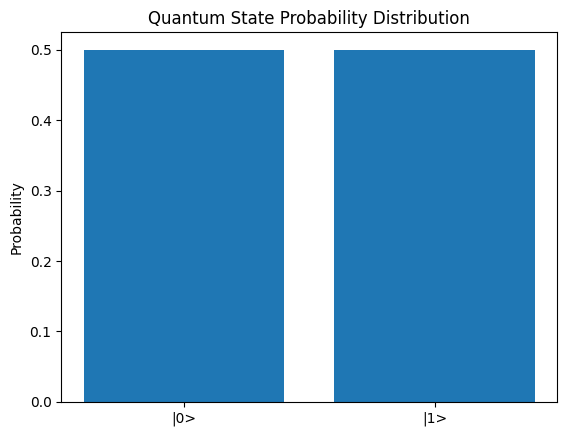

In [4]:
import matplotlib.pyplot as plt
state = np.array([1/np.sqrt(2), 1/np.sqrt(2)]) # Example quantum state (|0> + |1>)/sqrt(2)
prob = np.abs(state)**2
plt.bar([0, 1], prob)
plt.xticks([0, 1], ['|0>', '|1>'])
plt.ylabel('Probability')
plt.title('Quantum State Probability Distribution')
plt.show()

Note: you may need to restart the kernel to use updated packages.


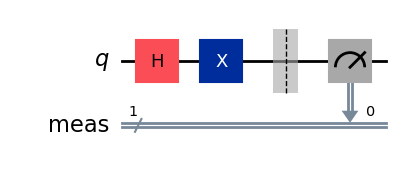

In [5]:
%pip install pylatexenc

from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

qc = QuantumCircuit(1)
qc.h(0)  # Hadamard gate
qc.x(0)  # Pauli-X gate
qc.measure_all()
qc.draw('mpl')

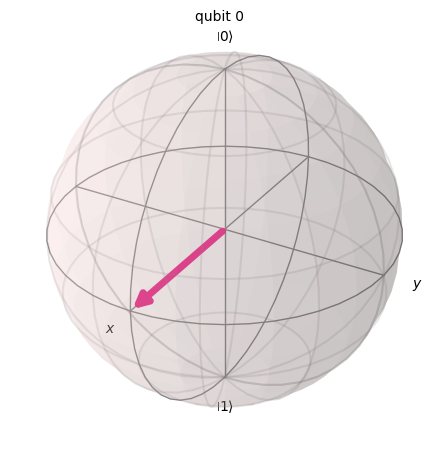

In [6]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

# Use the existing qc variable
qc = QuantumCircuit(1)
plot_bloch_multivector(state)

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
# |+> = H|0>, measuring in the computational basis -> 50% |0>, 50% |1>
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
sim = AerSimulator()
qc_t = transpile(qc, sim)
result = sim.run(qc_t, shots=1000).result()
counts = result.get_counts()
print(counts)

{'1': 483, '0': 517}


Statevector([1.11022302e-16+0.j, 1.00000000e+00+0.j],
            dims=(2,))


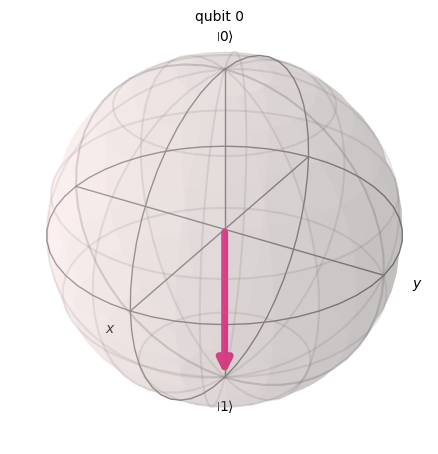

In [8]:
# Use the already imported QuantumCircuit and Statevector
import qiskit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(1)
# qc.x(0)
qc.h(0)
qc.ry(np.pi/2, 0)  # RX(π/2) rotation
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state)


In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

qc = QuantumCircuit(1)
qc.x(0)  # Apply X
qc.h(0)  # Then H

sim = AerSimulator(method="statevector")
qc_t = transpile(qc, sim)
result = sim.run(qc_t).result()
state = state = Statevector.from_instruction(qc)
print(state)  # [0.707+0j, -0.707+0j]

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


{'1 0': 492, '0 1': 508}


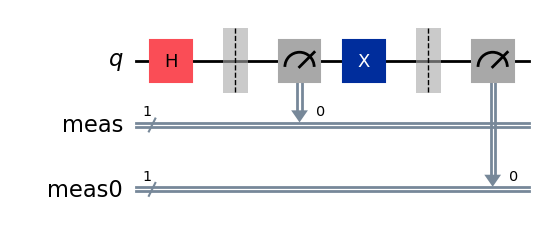

In [10]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.x(0)
qc.measure_all()
# state = Statevector.from_instruction(qc)
# Run 1000 shot
sim = AerSimulator()
qc_t = transpile(qc, sim)
result = sim.run(qc_t, shots=1000).result()
counts1 = result.get_counts()
print(counts1)
plot_bloch_multivector(state)
qc.draw('mpl')

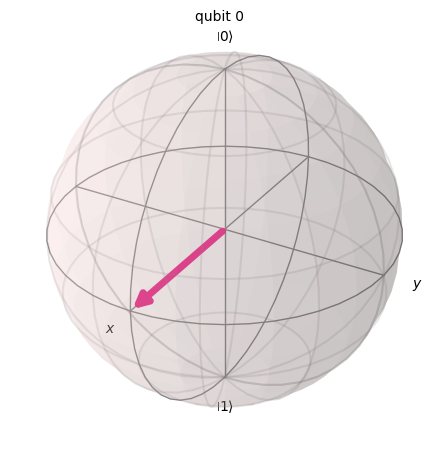

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

qc = QuantumCircuit(1)
qc.h(0)  # Then H
plot_bloch_multivector(Statevector.from_instruction(qc))

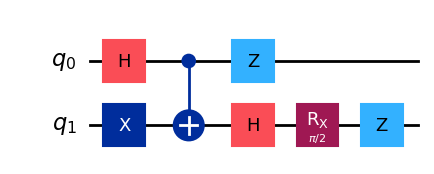

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)  # CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(1)
qc.z(0)
qc.rx(np.pi/2, 1)  # RX(π/2) rotation
qc.z(1)
state = Statevector.from_instruction(qc)
# Run 1000 shot
plot_bloch_multivector(state)
qc.draw('mpl')

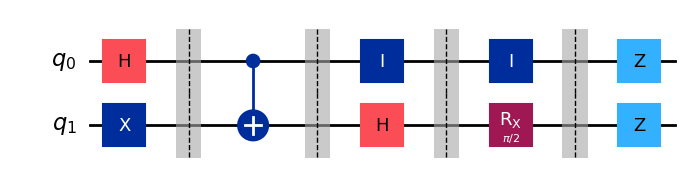

In [17]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.barrier()
qc.cx(0, 1)  # CNOT gate with qubit 0 as control and qubit 1 as target
qc.barrier()
qc.h(1)
qc.id(0)
qc.barrier()
qc.rx(np.pi/2, 1)  # RX(π/2) rotation
qc.id(0)
qc.barrier()
qc.z(0)
qc.z(1)
state = Statevector.from_instruction(qc)
# Run 1000 shot
plot_bloch_multivector(state)
qc.draw('mpl')